Moons_data

In [78]:
from sklearn.datasets import make_moons

X, y =  make_moons(n_samples =10000 , noise =0.4, random_state= 42)

In [79]:
X.shape

(10000, 2)

In [80]:
y.shape

(10000,)

train_test split

In [81]:
from sklearn.model_selection import train_test_split

shuffled_index = np.random.permutation(len(X))
X = X[shuffled_index]
y = y[shuffled_index]

X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [82]:
X_train.shape

(7000, 2)

In [83]:
X_test.shape

(3000, 2)

In [42]:
X_train

array([[ 0.84441684,  1.2423668 ],
       [ 0.16320378,  0.82374035],
       [ 1.24805333,  0.05579093],
       ...,
       [ 0.38876425, -0.78662881],
       [ 2.50492832,  0.21133631],
       [ 0.35428745,  0.74582457]])

In [43]:
y_train

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

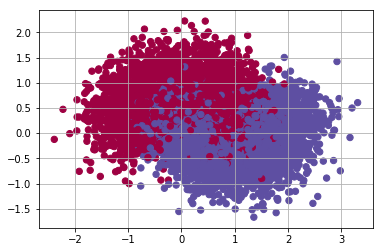

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt 
import matplotlib

plt.scatter(X_train[:,0],X_train[:,1], s=40, c=y_train, cmap=plt.cm.Spectral)
plt.grid(True)
plt.show()

DecisionTreeClassifier

In [84]:
from sklearn.tree import DecisionTreeClassifier
DecisionTreeClassifier()

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [85]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = { 'max_depth' :[2,5,10,30] , 'min_samples_leaf' : [10,30,50,100], 'max_leaf_nodes' :[10,30,50,100]}
tree_clf = DecisionTreeClassifier()

CV = GridSearchCV ( tree_clf, cv=10, param_grid = param_grid , scoring ='accuracy')
CV.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [2, 5, 10, 30], 'min_samples_leaf': [10, 30, 50, 100], 'max_leaf_nodes': [10, 30, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

best_parameters

In [86]:
CV.best_params_

{'max_depth': 10, 'max_leaf_nodes': 30, 'min_samples_leaf': 30}

In [87]:
pred_y = CV.predict(X_test)
sum=0
for i in range(0,len(X_test)) :
    if(pred_y[i]==y_test[i]) :
        sum+=1

In [88]:
sum/len(X_test)

0.8536666666666667

In [89]:
from sklearn.metrics import accuracy_score

accuracy_score(pred_y, y_test)

0.8536666666666667

more detail model 

In [90]:
param_grid = { 'max_leaf_nodes' :list(range(2,100)) , 'min_samples_leaf' : [2,3,5,7]}
tree_clf = DecisionTreeClassifier()

CV = GridSearchCV ( tree_clf, cv=10, param_grid = param_grid , scoring ='accuracy')
CV.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99], 'min_samples_leaf': [2, 3, 5, 7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
 

more best_parameters

In [91]:
CV.best_params_

{'max_leaf_nodes': 23, 'min_samples_leaf': 2}

In [92]:
CV.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=23,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [93]:
pred_y = CV.predict(X_test)
sum=0
for i in range(0,len(X_test)) :
    if(pred_y[i]==y_test[i]) :
        sum+=1

In [94]:
sum/len(X_test)

0.856

In [95]:
accuracy_score(pred_y, y_test)

0.856

In [96]:
tree_clf = CV.best_estimator_
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=23,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [97]:
import os, sys
from sklearn.externals.six import StringIO
if os.name == 'nt':      # if windows
    import pydot         # conda install pydot   (Anaconda package list has it)
elif os.name == 'posix' :  # if Linux, Mac ...        
    import pydotplus     # Linux : pip install pydotplus & sudo apt-get install graphviz 

from IPython.display import Image
from sklearn import tree

def show_tree(decision_tree, feature_names=None, class_names=None):   
    dot_data = StringIO()
    tree.export_graphviz(decision_tree, out_file=dot_data, feature_names=feature_names, 
                    class_names=class_names, filled=True, rounded=True)
    
    if os.name == 'nt':      # if windows
        graph = pydot.graph_from_dot_data(dot_data.getvalue())[0]
    elif os.name == 'posix' :  # if Linux, Mac ...        
        graph = pydotplus.graph_from_dot_data(dot_data.getvalue())    # for linux 

    return(graph) 

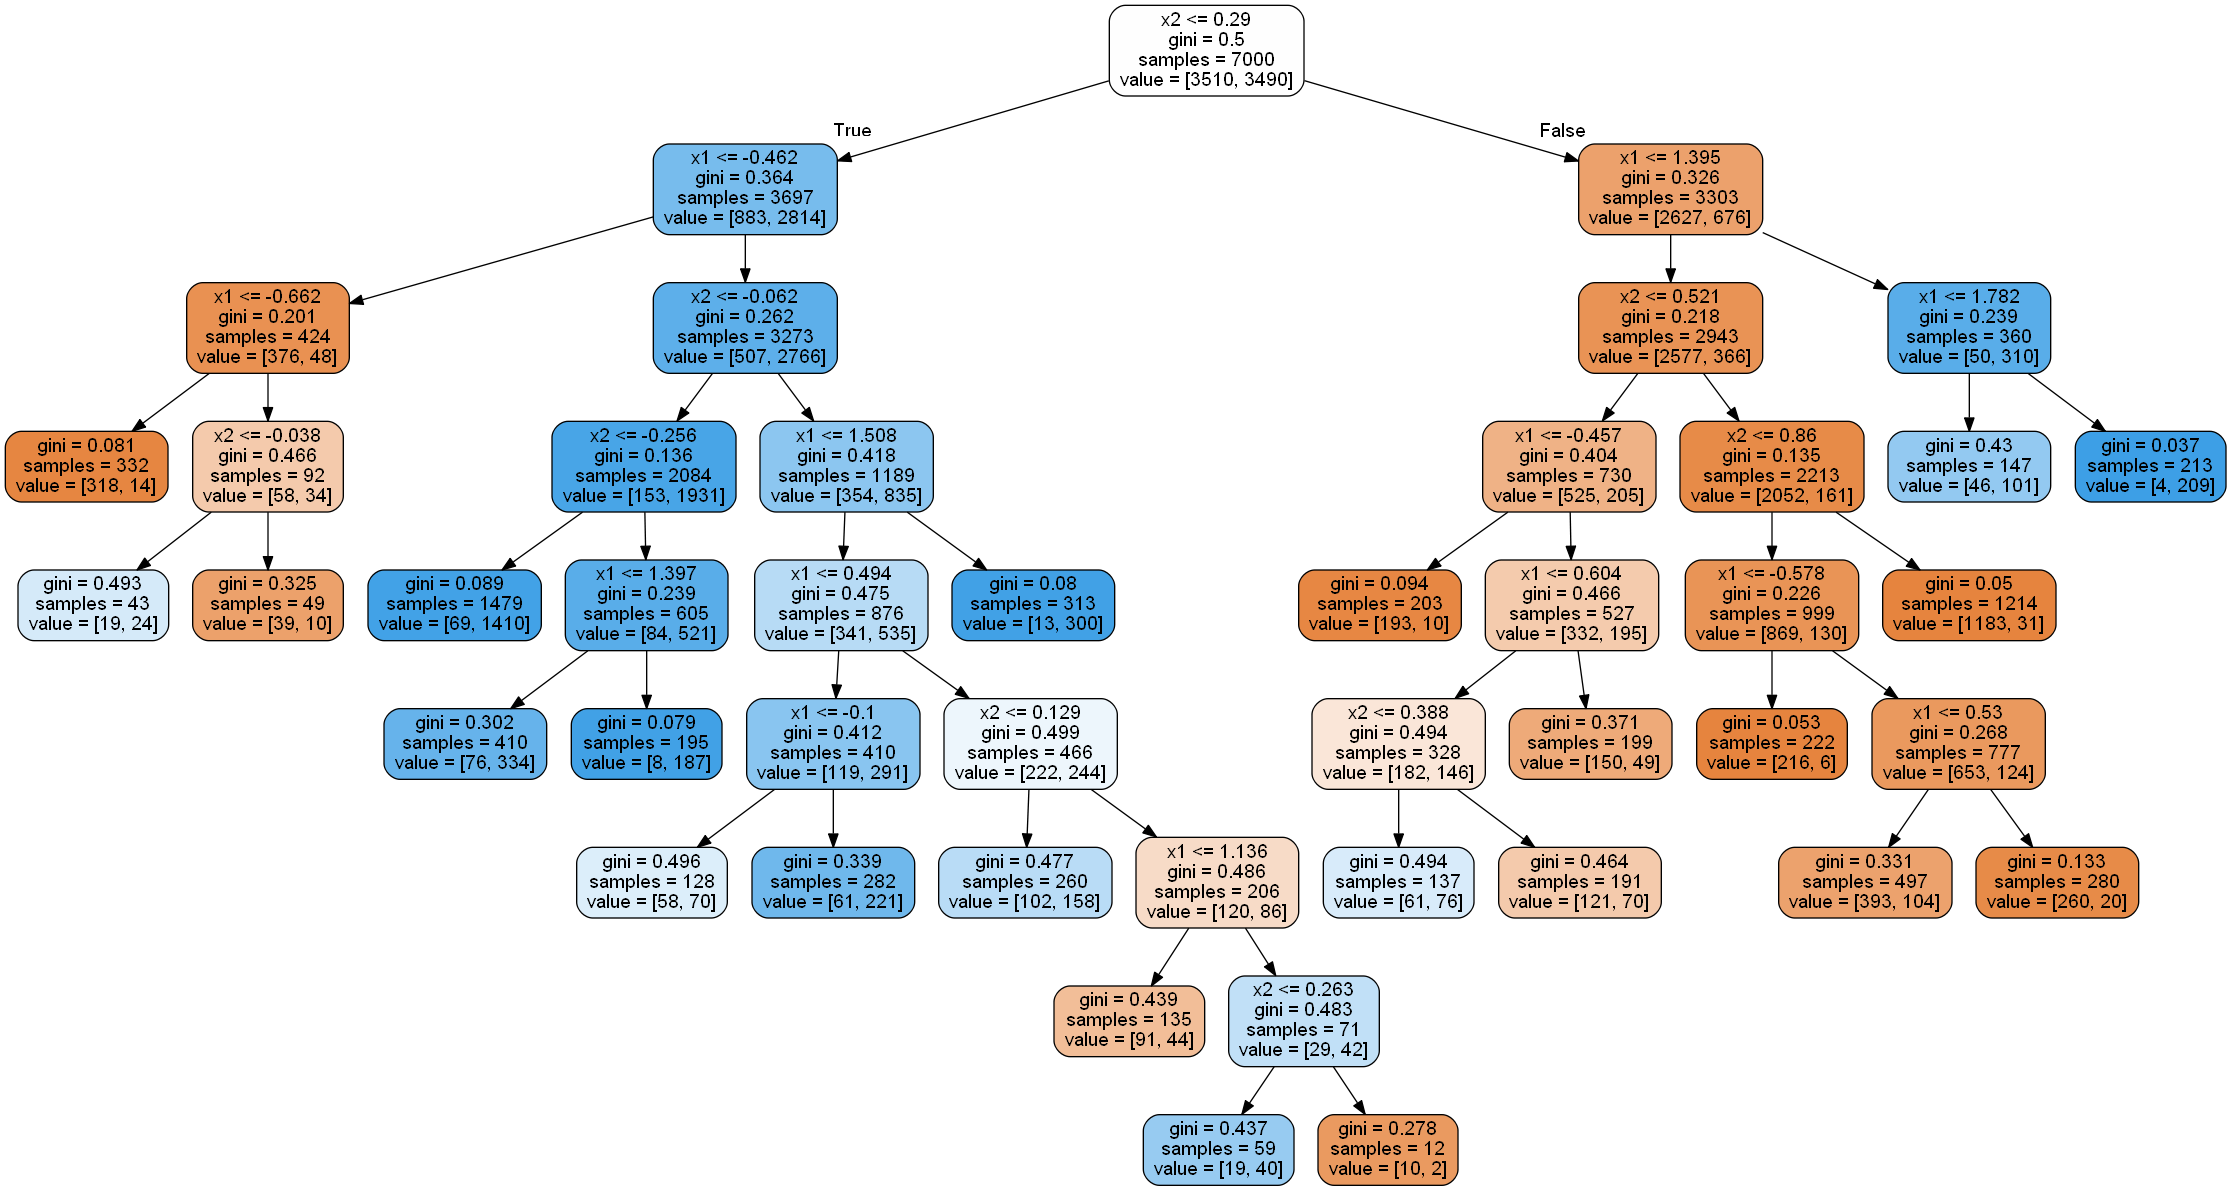

In [98]:
graph = show_tree(tree_clf, feature_names=['x1','x2'])
Image(graph.create_png())

RandomForest

resubsampling 

In [99]:
from sklearn.model_selection import ShuffleSplit

n_trees = 1000 
n_instances = 100
ss = ShuffleSplit(n_splits = n_trees, test_size= len(X_train)-n_instances, random_state=42 ) 

sub_sets = []
for train_sub_index , test_sub_index in  ss.split(X_train) :
    X_sub_train = X_train[train_sub_index]
    y_sub_train = y_train[train_sub_index]
    
    sub_sets.append((X_sub_train, y_sub_train))


In [100]:
from sklearn.base import clone
from sklearn.metrics import accuracy_score

forest = [clone(CV.best_estimator_) for _ in range(n_trees)]

acc = []

for tree, (X_sub_train, y_sub_train) in zip(forest, sub_sets) :
    tree.fit(X_sub_train, y_sub_train)
    pred_y = tree.predict(X_test)
    
    acc.append(accuracy_score(y_test, pred_y))
np.mean(acc)

0.7906866666666666

In [101]:
pred_y = np.empty([n_trees, len(X_test)])

for index, tree in enumerate(forest) :
    pred_y[index] = tree.predict(X_test)

In [102]:
from scipy.stats import mode 

y_pred_majority_votes, n_votes = mode(pred_y, axis=0)

In [106]:
y_test.shape

(3000,)

In [108]:
y_pred_majority_votes.shape

(1, 3000)

In [107]:
accuracy_score(y_test, y_pred_majority_votes.reshape(-1,1))

0.859